In [1]:
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

## 4.1 Least Squares and the Normal Equations
* Exercises 2, 8, 9.

### Exercises 2. Find the least squares solutions and RMSE of the following systems:
(a)
$\begin{bmatrix}
1 & 1 & 0 \\
0 & 1 & 1 \\
1 & 2 & 1 \\
1 & 0 & 1
\end{bmatrix}  \begin{bmatrix}
x_1 \\
x_2 \\
x_3 \
\end{bmatrix} = \begin{bmatrix}
2 \\
2 \\
3 \\
4
\end{bmatrix}$  &emsp;&emsp;(b) $\begin{bmatrix}
1 & 0 & 1 \\
1 & 0 & 2 \\
1 & 1 & 1 \\
2 & 1 & 1
\end{bmatrix}  \begin{bmatrix}
x_1 \\
x_2 \\
x_3 \
\end{bmatrix} = \begin{bmatrix}
2 \\
3 \\
1 \\
2
\end{bmatrix}$

In [2]:
def lss_RMSE(A,b):
    x=np.linalg.solve(np.dot(A.T,A), np.dot(A.T,b))
    r=b-np.dot(A,x)
    sqrt_SE=np.linalg.norm(r)
    RMSE=sqrt_SE/(r.shape[0]**0.5)
    return x, RMSE, sqrt_SE, np.dot(A.T,A),np.dot(A.T,b)

In [3]:
# (a)
A=np.array([[1,1,0],[0,1,1],[1,2,1],[1,0,1]])
b=np.array([2,2,3,4])
res=lss_RMSE(A,b)
print(f'least square solution: {res[0]}')
print(f'RMSE: {res[1]}')

least square solution: [ 2.         -0.33333333  2.        ]
RMSE: 0.2886751345948129


In [4]:
# (b)
A=np.array([[1,0,1],[1,0,2],[1,1,1],[2,1,1]])
b=np.array([2,3,1,2])
res=lss_RMSE(A,b)
print(f'least square solution: {res[0]}')
print(f'RMSE: {res[1]}')

least square solution: [ 1. -1.  1.]
RMSE: 1.1102230246251565e-16


### Exercises 8. Find the best line through each set of data points, and find the RMSE:
(a) (0,0), (1,3), (2,3), (5,6)&emsp;(b) (1,2), (3,2), (4,1), (6,3)&emsp;(c) (0,5), (1,3), (2,3), (3,1).

__$y = c_1 + c_2t$,  find $c_1 and c_2$ that the line will pass through points (t, y)__

In [5]:
# (a)
A=np.array([[1,0],[1,1],[1,2],[1,5]]) #c_1*1+c_2*t >> [1, t] coefficient of c_1 and c_2
b=np.array([0,3,3,6]) # all the y
c1, c2=lss_RMSE(A,b)[0]
RMSE=lss_RMSE(A,b)[1]
print(f'best_fitting line: y={round(c1,3)}+({round(c2,3)}*t)')
print(f'RMSE: {RMSE}')
a_RMSE_lin=RMSE

best_fitting line: y=0.857+(1.071*t)
RMSE: 0.6943650748294136


In [6]:
# (b)
A=np.array([[1,1],[1,3],[1,4],[1,6]])
b=np.array([2,2,1,3])
c1, c2=lss_RMSE(A,b)[0]
RMSE=lss_RMSE(A,b)[1]
print(f'best_fitting line: y={round(c1,3)}+({round(c2,3)}*t)')
print(f'RMSE: {RMSE}')
b_RMSE_lin=RMSE

best_fitting line: y=1.462+(0.154*t)
RMSE: 0.6504436355879909


In [7]:
# (c)
A=np.array([[1,0],[1,1],[1,2],[1,3]])
b=np.array([5,3,3,1])
c1, c2=lss_RMSE(A,b)[0]
RMSE=lss_RMSE(A,b)[1]
print(f'best_fitting line: y={round(c1,3)}+({round(c2,3)}*t)')
print(f'RMSE: {RMSE}')
c_RMSE_lin=RMSE

best_fitting line: y=4.8+(-1.2*t)
RMSE: 0.4472135954999579


### Exercises 9. Find the best parabola through each data point set in Exercise 8, and compare the RMSE with the best-line fit.
(a) (0,0), (1,3), (2,3), (5,6)&emsp;(b) (1,2), (3,2), (4,1), (6,3)&emsp;(c) (0,5), (1,3), (2,3), (3,1).

__$y = c_1 + c_2t+c_3t^{2}$,  find $c_1, c_2, and c_3$ that the line will pass through points (t, y)__

In [8]:
# (a)
A=np.array([[1,0,0],[1,1,1],[1,2,4],[1,5,25]]) #[1, t , t^2]
b=np.array([0,3,3,6]) #[y]
c1, c2, c3=lss_RMSE(A,b)[0]
RMSE=lss_RMSE(A,b)[1]
print(f'c1={c1}, c2={c2}, c3={c3}')
print(f'RMSE: {RMSE}')
a_RMSE_pol=RMSE
print(f'RMSE_linear minus RMSE_polynomial: {a_RMSE_lin-a_RMSE_pol}')

c1=0.3480662983425431, c2=1.9475138121546944, c3=-0.16574585635359088
RMSE: 0.5518677477890186
RMSE_linear minus RMSE_polynomial: 0.14249732704039497


__When fitting in a polynomial function, the RMSE is smaller than when fitting in a linear function.__

In [9]:
# (b)
A=np.array([[1,1,1],[1,3,9],[1,4,16],[1,6,36]])
b=np.array([2,2,1,3])
c1, c2, c3=lss_RMSE(A,b)[0]
RMSE=lss_RMSE(A,b)[1]
print(f'c1={c1}, c2={c2}, c3={c3}')
print(f'RMSE: {RMSE}')
b_RMSE_pol=RMSE
print(f'RMSE_linear minus RMSE_polynomial: {b_RMSE_lin-b_RMSE_pol}')

c1=2.9615384615384603, c2=-1.0128205128205119, c3=0.16666666666666655
RMSE: 0.41602514716892186
RMSE_linear minus RMSE_polynomial: 0.23441848841906904


__When fitting in a polynomial function, the RMSE is much smaller than when fitting in a linear function.__

In [10]:
# (c)
A=np.array([[1,0,0],[1,1,1],[1,2,4],[1,3,9]])
b=np.array([5,3,3,1])
c1, c2, c3=lss_RMSE(A,b)[0]
RMSE=lss_RMSE(A,b)[1]
print(f'c1={c1}, c2={c2}, c3={c3}')
print(f'RMSE: {RMSE}')
c_RMSE_pol=RMSE
print(f'RMSE_linear minus RMSE_polynomial: {c_RMSE_lin-c_RMSE_pol}')

c1=4.8, c2=-1.1999999999999977, c3=-8.326672684688676e-16
RMSE: 0.44721359549995804
RMSE_linear minus RMSE_polynomial: -1.1102230246251565e-16


__When fitting in a polynomial function, the RMSE is similar when fitting in a linear function since c3 is very small, resulting in the fitting line being linear.__

## 4.1 Least Squares and the Normal Equations
* Computer problems 1, 2.

### Exercises 1. Form the normal equations, and compute the least squares solution and 2-norm error for the following inconsistent systems:

(a)
$\begin{bmatrix}
3 & -1 & 2 \\
4 & 1 & 0 \\
-3 & 2 & 1 \\
1 & 1 & 5 \\
-2 & 0 & 3
\end{bmatrix}  \begin{bmatrix}
x_1 \\
x_2 \\
x_3 \
\end{bmatrix} = \begin{bmatrix}
10 \\
10 \\
-5 \\
15 \\
0
\end{bmatrix}$  &emsp;&emsp;(b) $\begin{bmatrix}
4 & 2 & 3 & 0 \\
-2 & 3 & -1 & 1 \\
1 & 3 & -4 & 2 \\
1 & 0 & 1 & -1 \\
3 & 1 & 3 & -2
\end{bmatrix}  \begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4
\end{bmatrix} = \begin{bmatrix}
10 \\
0 \\
2 \\
0 \\
5
\end{bmatrix}$

In [11]:
# a
A=np.array([[3,-1,2],[4,1,0],[-3,2,1],[1,1,5],[-2,0,3]])
b=np.array([10,10,-5,15,0])
res=lss_RMSE(A,b)
print(res[3], end=',')
print(res[4])
print(f'least square solution: {res[0]}')
print(f'2 norm error: {res[2]}')

[[39 -4  2]
 [-4  7  5]
 [ 2  5 39]],[100   5  90]
least square solution: [2.5246085  0.66163311 2.09340045]
2 norm error: 2.4134920906413537


* __Normal equation:&emsp;$\begin{bmatrix}
39 & -4 & 2 \\
-4 & 7 & 5 \\
2 & 5 & 39 
\end{bmatrix}  \begin{bmatrix}
x_1 \\
x_2 \\
x_3\
\end{bmatrix} = \begin{bmatrix}
100 \\
5 \\
90 
\end{bmatrix}$  &emsp;&emsp;__


* __The least squares solution:&emsp;$\begin{bmatrix}2.5246085 & 0.66163311 & 2.09340045\end{bmatrix}$__


* __2-norm error:&emsp;2.4134920906413537__

In [12]:
# b
A=np.array([[4,2,3,0],[-2,3,-1,1],[1,3,-4,2],[1,0,1,-1],[3,1,3,-2]])
b=np.array([10,0,2,0,5])
res=lss_RMSE(A,b)
print(res[3], end=',')
print(res[4])
print(f'least square solution: {res[0]}')
print(f'2 norm error: {res[2]}')

[[ 31   8  20  -7]
 [  8  23  -6   7]
 [ 20  -6  36 -16]
 [ -7   7 -16  10]],[57 31 37 -6]
least square solution: [1.27389608 0.6885086  1.21244902 1.74968966]
2 norm error: 0.8256398422677518


* __Normal equation:&emsp;$\begin{bmatrix}
31 & 8 & 20 & -7 \\
8 & 23 & -6 & 7 \\
20 & -6 & 36 & -16\\
-7 & 7 & -16 & 10
\end{bmatrix}  \begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4 \
\end{bmatrix} = \begin{bmatrix}
57 \\
31 \\
37 \\
-6 \
\end{bmatrix}$  &emsp;&emsp;__


* __The least squares solution:&emsp;$\begin{bmatrix}1.27389608 & 0.6885086 & 1.21244902 & 1.74968966\end{bmatrix}$__


* __2-norm error:&emsp;0.8256398422677518__

### Exercise 2. Consider the world oil production data of Computer Problem 3.2.3. Find the best least squares (a) line, (b) parabola, and (c) cubic curve through the 10 data points and the RMSE of the fits. Use each to estimate the 2010 production level. Which fit best represents the data in terms of RMSE?

__The aim is to find a fitting line that best fit the following 10 data points__


|year (t) |bbl/day (×$10^6$) (y)|
|-----|-------|
|1994 |67.052|
|1995 |68.008|
|1996 |69.803|
|1997 |72.024|
|1998 |73.400|
|1999 |72.063|
|2000 |74.669|
|2001 |74.487|
|2002 |74.065|
|2003 |76.777|


best_fitting line: y=-1865.002+(0.969)*t
RMSE: 0.9763180964494096
estimation of 2010 production level: 83.38227272738004


Text(0, 0.5, 'bbl/day (×10⁶)')

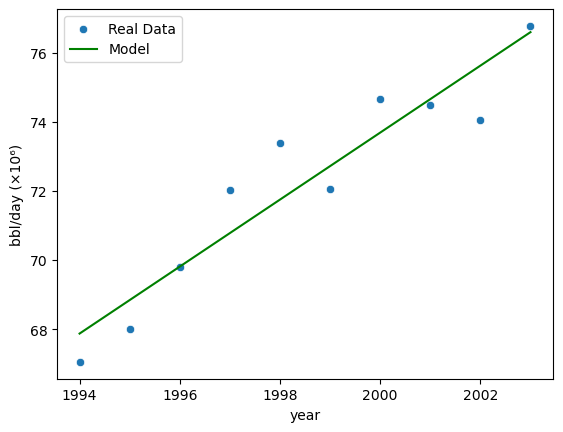

In [13]:
# (a) fit in y=c1+ c2*t
t=[i for i in range(1994,2004)]
y=[67.052, 68.008, 69.803, 72.024, 73.400, 72.063, 74.669, 74.487, 74.065, 76.777]
b=np.array(y)
A=[]
for i in t:
    A.append([1,i])
A=np.array(A)
c1, c2=lss_RMSE(A,b)[0]
predict_y=np.dot(A,lss_RMSE(A,b)[0])
RMSE=lss_RMSE(A,b)[1]
print(f'best_fitting line: y={round(c1,3)}+({round(c2,3)})*t')
print(f'RMSE: {RMSE}')
print(f'estimation of 2010 production level: {c1+c2*2010}')

sns.scatterplot(x=t, y=y)
sns.lineplot(x=t,y=predict_y,color='green')
plt.legend(["Real Data","Model"])
plt.xlabel('year')
plt.ylabel('bbl/day (×10⁶)')

best_fitting line: y=-290832.68801070936+(290.15451714739606)*t+(-0.0723505558406423)*t^2
RMSE: 0.8226766517448139
estimation of 2010 production level: 74.41080377774779


Text(0, 0.5, 'bbl/day (×10⁶)')

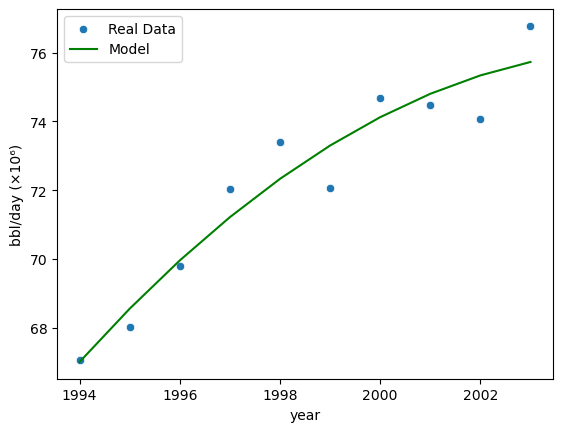

In [14]:
# (b) fit in y=c1+ c2*t+ c3*t^2
t=[i for i in range(1994,2004)]
y=[67.052, 68.008, 69.803, 72.024, 73.400, 72.063, 74.669, 74.487, 74.065, 76.777]
b=np.array(y, dtype=float)
A=[]
for i in t:
    A.append([1,i,i**2])
A=np.array(A, dtype=float)
c1, c2, c3=lss_RMSE(A,b)[0]
predict_y=np.dot(A,lss_RMSE(A,b)[0])
RMSE=lss_RMSE(A,b)[1]
print(f'best_fitting line: y={c1}+({c2})*t+({c3})*t^2')
print(f'RMSE: {RMSE}')
print(f'estimation of 2010 production level: {c1+c2*2010+c3*2010**2}')

sns.scatterplot(x=t, y=y)
sns.lineplot(x=t,y=predict_y,color='green')
plt.legend(["Real Data","Model"])
plt.xlabel('year')
plt.ylabel('bbl/day (×10⁶)')

best_fitting line: y=-1668062.0102466603+(2357.601023272268)*t+(-1.1068744264105423)*t^2+(0.00017255397361442182)*t^3
RMSE: 0.8215014567158089
estimation of 2010 production level: 74.64707661280409


Text(0, 0.5, 'bbl/day (×10⁶)')

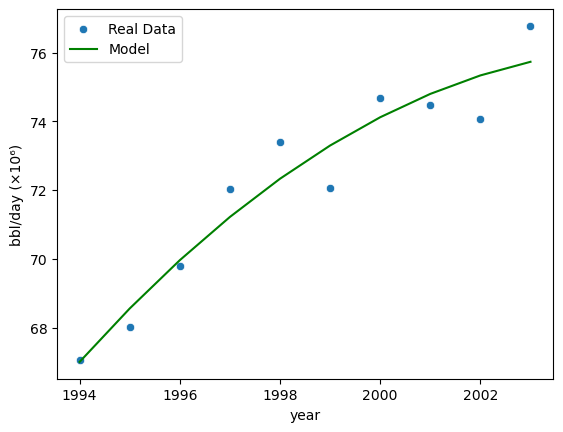

In [15]:
# (c) fit in y=c1+ c2*t+ c3*t^2+ c4*t^3
t=[i for i in range(1994,2004)]
y=[67.052, 68.008, 69.803, 72.024, 73.400, 72.063, 74.669, 74.487, 74.065, 76.777]
b=np.array(y, dtype=float)
A=[]
for i in t:
    A.append([1,i,i**2,i**3])
A=np.array(A, dtype=float)
c1, c2, c3, c4=lss_RMSE(A,b)[0]
predict_y=np.dot(A,lss_RMSE(A,b)[0])
RMSE=lss_RMSE(A,b)[1]
print(f'best_fitting line: y={c1}+({c2})*t+({c3})*t^2+({c4})*t^3')
print(f'RMSE: {RMSE}')
print(f'estimation of 2010 production level: {c1+c2*2010+c3*2010**2+c4*2010**3}')

sns.scatterplot(x=t, y=y)
sns.lineplot(x=t,y=predict_y,color='green')
plt.legend(["Real Data","Model"])
plt.xlabel('year')
plt.ylabel('bbl/day (×10⁶)')

__In terms of RMSE, cubic curve fit the best since its RMSE is the smallest. However, the RMSE from parabola and cubic curve are similar.__

## 4.2 A Survey of Models
* Exercises 6

### Exercises 6. Fit data to the drug concentration model (4.21). Find the RMSE of the fit.


### <center> $Model: y = c_1\times t\times e^{c_2 t}$</center>

### <center> $ln y = ln c_1 + ln t + c_2\times t$</center> 

### <center> let $ln c_1 = k, c_1= e ^k$, solve k and $c_2$ in $ln y-lnt=k+c_2\times t$ (b=Ax) </center>


__(a)__

|t |y|
|--|--|
|1 |3|
|2 |4|
|3 |5|
|4 |5|

best_fitting line: y=3.794733192202054*t*e^(-0.2808727768855654t)
RMSE: 0.18657577248061716


Text(0, 0.5, 'y')

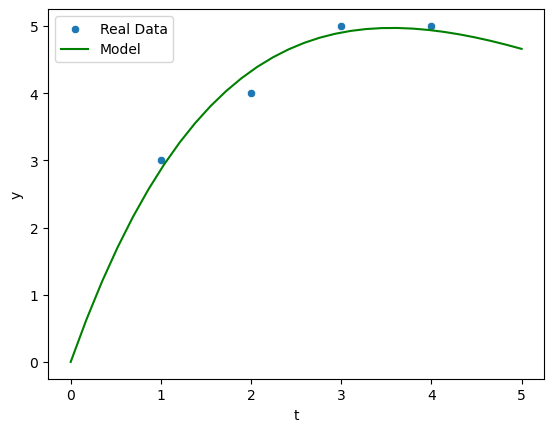

In [16]:
ys=[3,4,5,5]
ts=[i for i in range(1,5)]
b=np.log(ys)-np.log(ts)
A=[]
for t in ts:
    A.append([1,t])
A=np.array(A)
c1, c2=math.exp(lss_RMSE(A,b)[0][0]),lss_RMSE(A,b)[0][1]
predict_y=c1*np.array(ts)*np.exp(c2*np.array(ts))
error=predict_y-np.array(ys)
sqrt_SE=np.linalg.norm(error)
RMSE=sqrt_SE/(error.shape[0]**0.5)
print(f'best_fitting line: y={c1}*t*e^({c2}t)')
print(f'RMSE: {RMSE}')


sns.scatterplot(x=ts, y=ys)
mt=np.linspace(0,5,30)
predict_y_m=c1*np.array(mt)*np.exp(c2*np.array(mt))
sns.lineplot(x=mt,y=predict_y_m,color='green')
plt.legend(["Real Data","Model"])
plt.xlabel('t')
plt.ylabel('y')

__(b)__

|t |y|
|--|--|
|1 |2|
|2 |4|
|3 |3|
|4 |2|

best_fitting line: y=3.9999999999999973*t*e^(-0.4852030263919615t)
RMSE: 0.5658265547431596


Text(0, 0.5, 'y')

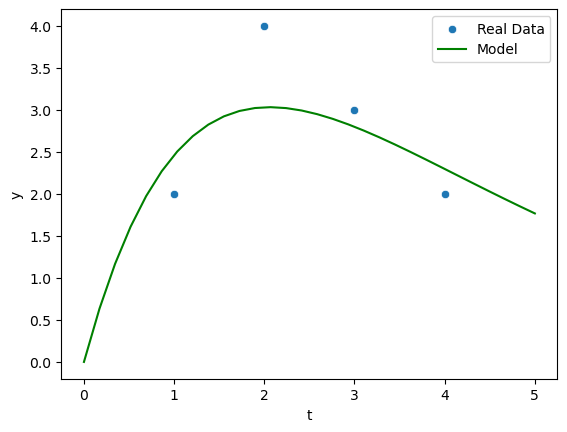

In [17]:
ys=[2,4,3,2]
ts=[i for i in range(1,5)]
b=np.log(ys)-np.log(ts)
A=[]
for t in ts:
    A.append([1,t])
A=np.array(A)
A=np.array(A)
c1, c2=math.exp(lss_RMSE(A,b)[0][0]),lss_RMSE(A,b)[0][1]
predict_y=c1*np.array(ts)*np.exp(c2*np.array(ts))
error=predict_y-np.array(ys)
sqrt_SE=np.linalg.norm(error)
RMSE=sqrt_SE/(error.shape[0]**0.5)
print(f'best_fitting line: y={c1}*t*e^({c2}t)')
print(f'RMSE: {RMSE}')

sns.scatterplot(x=ts, y=ys)
mt=np.linspace(0,5,30)
predict_y_m=c1*np.array(mt)*np.exp(c2*np.array(mt))
sns.lineplot(x=mt,y=predict_y_m,color='green')
plt.legend(["Real Data","Model"])
plt.xlabel('t')
plt.ylabel('y')

## 4.2 A Survey of Models
* Computer problems 3

### Exercises 3. Consider the world population data of Computer Problem 3.1.1. Find the best exponential fit of the data points by using linearization. Estimate the 1980 population, and find the estimation error.

|year (t) |population (y)|
|--|--|
|1960 |3039585530|
|1970 |3707475887|
|1990 |5281653820|
|2000 |6079603571|

### <center>Compare with the 1980 estimate of 4452584592</center>

### <center>exponential model $y = c_1\times e^{c_2t}$</center>
### <center> $ln y = ln(c_1\times e^{c_2t}) = ln c_1 + c_2\times t$</center>
### <center> let $ln c_1 = k, c_1= e ^k$, solve k and $c_2$ in $ln y=k+c_2\times t$ (b=Ax) </center>

best exponential fit: y=3079440361.3791165*e^(0.017403246298071832*(t-1960))
estimated population in 1980: 4361485915
error: 91098677


Text(0, 0.5, 'population')

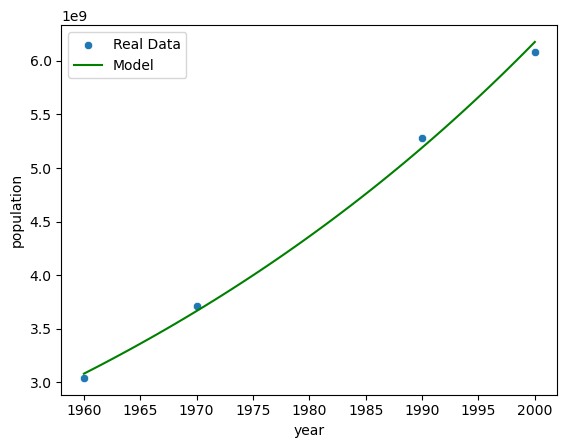

In [18]:
ts=[1960,1970,1990,2000]
ys=[3039585530,3707475887,5281653820,6079603571]
b=np.log(ys)
A=[]
for t in ts:
    A.append([1,t-1960])
A=np.array(A)
c1, c2=math.exp(lss_RMSE(A,b)[0][0]),lss_RMSE(A,b)[0][1]

predict_y=int(c1*math.exp(c2*(1980-1960)))
error=abs(predict_y-4452584592)

print(f'best exponential fit: y={c1}*e^({c2}*(t-1960))')
print(f'estimated population in 1980: {predict_y}')
print(f'error: {error}')

def model(t):
    return int(c1*math.exp(c2*(t-1960)))
sns.scatterplot(x=ts, y=ys)

# plotting the prediction model
mt=np.linspace(1960,2000)
predict_y_m=[model(i) for i in mt]
sns.lineplot(x=mt,y=predict_y_m,color='green')
plt.legend(["Real Data","Model"])
plt.xlabel('year')
plt.ylabel('population')

## 4.3 QR Factorization
* Exercises 2, 7 (Use the QR factorization from Exercise 2)

### Exercises 2. Apply classical Gram–Schmidt orthogonalization to find the full QR factorization of the following matrices:



### <center>A1 : the first column of A (y1),&emsp;A2: the second column of A </center>
### <center>Since A is a 3*2 matrix, we added a third vector A3 [1,0,0] (linearly independent of the first two columns) </center>
### <center>$q_1=\frac{y_1}{||y_1||_2},r_{11}=||y_1||_2$</center>
### <center>$y_2 = A_2 − q_1q_1^TA_2,r_{12}=q_1^TA_2$</center>
### <center>$q_2=\frac{y_2}{||y_2||_2}, r_{22}=||y_2||_2$</center>
### <center>$y_3 = A_3 − q_1q_1^TA_3− q_2q_2^TA_3$</center>
### <center>$q_3=\frac{y_3}{||y_3||_2}$</center>

(a)&emsp;
$\begin{bmatrix}
2 & 3 \\
-2 &-6 \\
1 & 0
\end{bmatrix}  $

In [19]:
A=np.array([[2,3],[-2,-6],[1,0]])
y1=A[:,0] #A1
A2=A[:,1]
A3=np.array([1,0,0])

r11=np.linalg.norm(y1)
q1=y1/r11

r12=np.dot(q1.T,A2)
y2=A2-np.dot(q1,r12)
r22=np.linalg.norm(y2)
q2=y2/r22

y3=A3-np.dot(q1,np.dot(q1.T,A3))-np.dot(q2,np.dot(q2.T,A3))
q3=y3/np.linalg.norm(y3)

R_a=np.array([[r11,r12],[0,r22],[0,0]])
Q_a=np.column_stack((q1,q2,q3))

In [20]:
Q_a

array([[ 0.66666667, -0.33333333,  0.66666667],
       [-0.66666667, -0.66666667,  0.33333333],
       [ 0.33333333, -0.66666667, -0.66666667]])

In [21]:
R_a

array([[3., 6.],
       [0., 3.],
       [0., 0.]])

In [22]:
# Check if Q is orthogonal
# If Q is an orthogonal m × m matrix and x is an m-dimensional vector, then||Qx||2 = ||x||2.
print('The shape of Q: ',Q_a.shape)
print('check if Q is orthogonal:')
x=np.array([1,2,3])
print('||Qx||:',np.linalg.norm(np.dot(Q_a,x)))
print('||x|| :',np.linalg.norm(x))

The shape of Q:  (3, 3)
check if Q is orthogonal:
||Qx||: 3.7416573867739413
||x|| : 3.7416573867739413


In [23]:
# Check if A=QR
print(np.dot(Q_a,R_a))

[[ 2.  3.]
 [-2. -6.]
 [ 1.  0.]]


__||Qx||=||x|| >> Q is orthogonal , A=QR >> successfully factorized A__ 

(b)&emsp;
$\begin{bmatrix}
-4 & -4 \\
-2 & 7 \\
4 & -5
\end{bmatrix}  $

In [24]:
A=np.array([[-4,-4],[-2,7],[4,-5]])
y1=A[:,0] #A1
A2=A[:,1]
A3=np.array([1,0,0])

r11=np.linalg.norm(y1)
q1=y1/r11

r12=np.dot(q1.T,A2)
y2=A2-np.dot(q1,r12)
r22=np.linalg.norm(y2)
q2=y2/r22

y3=A3-np.dot(q1,np.dot(q1.T,A3))-np.dot(q2,np.dot(q2.T,A3))
q3=y3/np.linalg.norm(y3)

R_b=np.array([[r11,r12],[0,r22],[0,0]])
Q_b=np.column_stack((q1,q2,q3))

In [25]:
Q_b

array([[-0.66666667, -0.66666667,  0.33333333],
       [-0.33333333,  0.66666667,  0.66666667],
       [ 0.66666667, -0.33333333,  0.66666667]])

In [26]:
R_b

array([[ 6., -3.],
       [ 0.,  9.],
       [ 0.,  0.]])

In [27]:
# If Q is an orthogonal m × m matrix and x is an m-dimensional vector, then||Qx||2 = ||x||2.
print('The shape of Q: ',Q_b.shape)
print('check if Q is orthogonal:')
x=np.array([1,2,3])
print('||Qx||:',np.linalg.norm(np.dot(Q_b,x)))
print('||x|| :',np.linalg.norm(x))

The shape of Q:  (3, 3)
check if Q is orthogonal:
||Qx||: 3.7416573867739413
||x|| : 3.7416573867739413


__||Qx||=||x|| >> Q is orthogonal , A=QR >> successfully factorized A__

### Exercises 7. Use the QR factorization from Exercise 2, 4, or 6 to solve the least squares problem.

(a)&emsp;
$\begin{bmatrix}
2 & 3 \\
-2 &-6 \\
1 & 0
\end{bmatrix}\begin{bmatrix}
x_1 \\
x_2 
\end{bmatrix}=\begin{bmatrix}
3 \\
-3 \\
6 
\end{bmatrix}$

In [28]:
# classical Gram–Schmidt orthogonalization
# Ax=b, A = QR >> QRx=b >> Q.T QRx = Q.T b >> Rx=Q.T b
# R^ = upper n × n submatrix of R
# d^ = upper n entries of d = Q.T b
# Solve R^x = d^ for least squares solution x.
b=np.array([3,-3,6])
Ru=R_a[:2,:2]
du=np.dot(Q_a.T,b)[:2]
x1,x2=np.linalg.solve(Ru,du)
print('solution:',[x1,x2])

solution: [4.0, -1.0]


In [29]:
# modified Gram–Schmidt orthogonalization (different ways to get q3)

A=np.array([[2,3],[-2,-6],[1,0]])
y1=A[:,0] #A1
A2=A[:,1]
A3=np.array([1,0,0])

r11=np.linalg.norm(y1)
q1=y1/r11

r12=np.dot(q1.T,A2)
y2=A2-np.dot(q1,r12)
r22=np.linalg.norm(y2)
q2=y2/r22

#------------------------------------- different from classical Gram–Schmidt orthogonalization----------------------
y3_1=A3-np.dot(q1,np.dot(q1.T,A3))
y3=y3_1-np.dot(q2,np.dot(q2.T,y3_1))
q3=y3/np.linalg.norm(y3)
#--------------------------------------------------------------------------------------------------------------------
R_am=np.array([[r11,r12],[0,r22],[0,0]])
Q_am=np.column_stack((q1,q2,q3))

# solve the equation
b=np.array([3,-3,6])
Ru=R_am[:2,:2]
du=np.dot(Q_am.T,b)[:2]
x1,x2=np.linalg.solve(Ru,du)
print('solution:',[x1,x2])

solution: [4.0, -1.0]


(b)&emsp;
$\begin{bmatrix}
-4 & -4 \\
-2 & 7 \\
4 & -5
\end{bmatrix}\begin{bmatrix}
x_1 \\
x_2 
\end{bmatrix}=\begin{bmatrix}
3 \\
9 \\
0 
\end{bmatrix}$

In [30]:
# classical Gram–Schmidt orthogonalization
# Ax=b, A = QR >> QRx=b >> Q.T QRx = Q.T b >> Rx=Q.T b
# R^ = upper n × n submatrix of R
# d^ = upper n entries of d = Q.T b
# Solve R^x = d^ for least squares solution x.
b=np.array([3,9,0])
Ru=R_b[:2,:2]
du=np.dot(Q_b.T,b)[:2]
x1,x2=np.linalg.solve(Ru,du)
print('solution:',[x1,x2])

solution: [-0.6111111111111112, 0.4444444444444444]


In [31]:
# modified Gram–Schmidt orthogonalization (different ways to get q3)

A=np.array([[-4,-4],[-2,7],[4,-5]])
y1=A[:,0] #A1
A2=A[:,1]
A3=np.array([1,0,0])

r11=np.linalg.norm(y1)
q1=y1/r11

r12=np.dot(q1.T,A2)
y2=A2-np.dot(q1,r12)
r22=np.linalg.norm(y2)
q2=y2/r22

#------------------------------------- different from classical Gram–Schmidt orthogonalization----------------------
y3_1=A3-np.dot(q1,np.dot(q1.T,A3))
y3=y3_1-np.dot(q2,np.dot(q2.T,y3_1))
q3=y3/np.linalg.norm(y3)
#--------------------------------------------------------------------------------------------------------------------

R_bm=np.array([[r11,r12],[0,r22],[0,0]])
Q_bm=np.column_stack((q1,q2,q3))

# solve the equation
b=np.array([3,9,0])
Ru=R_bm[:2,:2]
du=np.dot(Q_bm.T,b)[:2]
x1,x2=np.linalg.solve(Ru,du)
print('solution:',[x1,x2])

solution: [-0.6111111111111112, 0.4444444444444444]


## 4.3 QR Factorization
* Computer problems 1, 5

### Exercise 1. Write a MATLAB program that implements the modified Gram–Schmidt method to find the reduced QR factorization. Only one line from the classical version needs to be changed. Check your work by comparing factorizations of the matrices in Exercise 1 with the MATLAB qr(A,0) command or equivalent. The factorization is unique up to signs of the entries of Q and R.

In [32]:
def QR_fact_classic(A):
    Q=np.zeros((A.shape[0],1))
    R=np.zeros((A.shape[1],A.shape[1]))
    R[0,0]=np.linalg.norm(A[:,0])
    Q[:,0]=A[:,0]/R[0,0]
    for j in range(1,A.shape[1]):
        An=A[:,j]
        #print(An)
        sub=0
        for i in range(j):
            #print(i)
            R[i,j]=np.dot(Q[:,i].T,An)
            sub+=np.dot(Q[:,i],np.dot(Q[:,i].T,An))
                     
        yn=An-sub
        Qn=yn/np.linalg.norm(yn)
        R[j,j]=np.linalg.norm(yn)
        Q=np.column_stack((Q,Qn))
    
    return Q, R

In [33]:
def QR_fact_modified(A):

    Q=np.zeros((A.shape[0],1))
    R=np.zeros((A.shape[1],A.shape[1]))
    R[0,0]=np.linalg.norm(A[:,0])
    Q[:,0]=A[:,0]/R[0,0]
    for j in range(1,A.shape[1]):
        An=A[:,j]
        for i in range(j):
            #print(i)
            R[i,j]=np.dot(Q[:,i].T,An)
            An=An-np.dot(R[i,j],Q[:,i]) # different from classical                    
        yn=An
        Qn=yn/np.linalg.norm(yn)
        R[j,j]=np.linalg.norm(yn)
        Q=np.column_stack((Q,Qn))
    return Q, R
    

(a)&emsp;
$\begin{bmatrix}
4 & 0 \\
3 & 1 \
\end{bmatrix}$&emsp;(b)&emsp;$\begin{bmatrix}
1 & 2 \\
1 & 1 
\end{bmatrix}$&emsp;(c)&emsp;$\begin{bmatrix}
2 & 1 \\
1 & -1 \\
2 & 1 
\end{bmatrix}$&emsp;(d)&emsp;$\begin{bmatrix}
4 & 8 & 1 \\
0 & 2 & -2 \\
3 & 6 & 7 
\end{bmatrix}$

In [34]:
# Test with exercise 1 (a)
A=np.array([[-4,0],[3,1]])
Q, R =QR_fact_modified(A)
x=np.array([1,2])
print('test whether Q is an orthogonal matrix:')
print('||Qx||:',np.linalg.norm(np.dot(Q,x)))
print('||x|| :',np.linalg.norm(x))
print()
print('Q from self defined function:')
print(Q)
print('R from self defined function:')
print(R)
print()
print('python qr function')
print(np.linalg.qr(A)[0])
print(np.linalg.qr(A)[1])

test whether Q is an orthogonal matrix:
||Qx||: 2.2360679774997894
||x|| : 2.23606797749979

Q from self defined function:
[[-0.8  0.6]
 [ 0.6  0.8]]
R from self defined function:
[[5.  0.6]
 [0.  0.8]]

python qr function
[[-0.8  0.6]
 [ 0.6  0.8]]
[[5.  0.6]
 [0.  0.8]]


In [35]:
# Test with exercise 1 (b)
A=np.array([[1,2],[1,1]])
Q, R =QR_fact_modified(A)
x=np.array([1,2])
print('test whether Q is an orthogonal matrix:')
print('||Qx||:',np.linalg.norm(np.dot(Q,x)))
print('||x|| :',np.linalg.norm(x))
print()
print('Q from self defined function:')
print(Q)
print('R from self defined function:')
print(R)
print()
print('python qr function')
print(np.linalg.qr(A)[0])
print(np.linalg.qr(A)[1])

test whether Q is an orthogonal matrix:
||Qx||: 2.23606797749979
||x|| : 2.23606797749979

Q from self defined function:
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
R from self defined function:
[[1.41421356 2.12132034]
 [0.         0.70710678]]

python qr function
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[[-1.41421356 -2.12132034]
 [ 0.         -0.70710678]]


In [36]:
# Test with exercise 1 (c)
A=np.array([[2,1],[1,-1],[2,1]])
Q, R =QR_fact_modified(A)
x=np.array([1,2])
print('test whether Q is an orthogonal matrix:')
print('||Qx||:',np.linalg.norm(np.dot(Q,x)))
print('||x|| :',np.linalg.norm(x))
print()
print('Q from self defined function:')
print(Q)
print('R from self defined function:')
print(R)
print()
print('python qr function')
print(np.linalg.qr(A)[0])
print(np.linalg.qr(A)[1])

test whether Q is an orthogonal matrix:
||Qx||: 2.2360679774997894
||x|| : 2.23606797749979

Q from self defined function:
[[ 0.66666667  0.23570226]
 [ 0.33333333 -0.94280904]
 [ 0.66666667  0.23570226]]
R from self defined function:
[[3.         1.        ]
 [0.         1.41421356]]

python qr function
[[-0.66666667  0.23570226]
 [-0.33333333 -0.94280904]
 [-0.66666667  0.23570226]]
[[-3.         -1.        ]
 [ 0.          1.41421356]]


In [37]:
# Test with exercise 1 (d)
A=np.array([[4,8,1],[0,2,-2],[3,6,7]])
Q, R =QR_fact_modified(A)
x=np.array([1,2,3])
print('test whether Q is an orthogonal matrix:')
print('||Qx||:',np.linalg.norm(np.dot(Q,x)))
print('||x|| :',np.linalg.norm(x))
print()
print('Q from self defined function:')
print(Q)
print('R from self defined function:')
print(R)
print()
print('python qr function')
print(np.linalg.qr(A)[0])
print(np.linalg.qr(A)[1])

test whether Q is an orthogonal matrix:
||Qx||: 3.7416573867739418
||x|| : 3.7416573867739413

Q from self defined function:
[[ 0.8  0.  -0.6]
 [ 0.   1.   0. ]
 [ 0.6  0.   0.8]]
R from self defined function:
[[ 5. 10.  5.]
 [ 0.  2. -2.]
 [ 0.  0.  5.]]

python qr function
[[-8.00000000e-01  9.99200722e-17 -6.00000000e-01]
 [-0.00000000e+00 -1.00000000e+00 -1.66533454e-16]
 [-6.00000000e-01 -1.33226763e-16  8.00000000e-01]]
[[ -5. -10.  -5.]
 [  0.  -2.   2.]
 [  0.   0.   5.]]


__All four results demonstrated Q is orthogonal. The QR factorization does not only have a specific factorization. The Q and R generated by the self-defined function have different directions from python's qr function.__

### Exercise 5. Use the MATLAB QR factorization to find the least squares solutions and 2-norm error of the following inconsistent systems:

In [38]:
def solve_with_QR(A,b):
    Q, R= QR_fact_modified(A)
    d=np.dot(Q.T,b)
    root=np.linalg.solve(R,d)
    norm_e=np.linalg.norm(np.dot(A,root)-b)
    return root, norm_e

def solve_with_numpyQR(A,b):
    Q, R= np.linalg.qr(A)
    d=np.dot(Q.T,b)
    root=np.linalg.solve(R,d)
    norm_e=np.linalg.norm(np.dot(A,root)-b)
    return root, norm_e
    

(a)&emsp;
$\begin{bmatrix}
1 & 1 \\
2 & 1 \\
1 & 2 \\
0 & 3
\end{bmatrix}\begin{bmatrix}
x_1 \\
x_2 
\end{bmatrix}=\begin{bmatrix}
3 \\
5 \\
5 \\
5
\end{bmatrix}$

In [39]:
A=np.array([[1,1],[2,1],[1,2],[0,3]])
b=np.array([3,5,5,5])
res=solve_with_QR(A,b)
res_p=solve_with_numpyQR(A,b)
print('solution from self-defined function:',res[0])
print('solution from python defined function:',res_p[0])
print('2-norm error from self-defined function:',res[1])
print('2-norm error from python defined function:',res_p[1])
print('difference in 2-norm:',res[1]-res_p[1])

solution from self-defined function: [1.61538462 1.66153846]
solution from python defined function: [1.61538462 1.66153846]
2-norm error from self-defined function: 0.3038218101250999
2-norm error from python defined function: 0.3038218101251001
difference in 2-norm: -2.220446049250313e-16


(b)&emsp;
$\begin{bmatrix}
1 & 2 & 2 \\
2 & -1 & 2 \\
3 & 1 & 1 \\
1 & 1 & -1
\end{bmatrix}\begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix}=\begin{bmatrix}
10 \\
5 \\
10 \\
3
\end{bmatrix}$

In [40]:
A=np.array([[1,2,2],[2,-1,2],[3,1,1],[1,1,-1]])
b=np.array([10,5,10,3])
res=solve_with_QR(A,b)
res_p=solve_with_numpyQR(A,b)
print('solution from self-defined function:',res[0])
print('solution from python defined function:',res_p[0])
print('2-norm error from self-defined function:',res[1])
print('2-norm error from python defined function:',res_p[1])
print('difference in 2-norm:',res[1]-res_p[1])

solution from self-defined function: [2.05882353 2.37254902 1.57843137]
solution from python defined function: [2.05882353 2.37254902 1.57843137]
2-norm error from self-defined function: 0.2214037213850231
2-norm error from python defined function: 0.22140372138502276
difference in 2-norm: 3.3306690738754696e-16


__The two solvers generate consistent results. The self-defined function can work.__

### Exercises Not from the Textbook
1. Let’s generate our data in the following way: Start by sampling the cubic polynomial

<center>$q(t)=-11+\frac{55}{3}t-\frac{17}{2}t^2+\frac{7}{6}t^3$
    
at 33 equidistant points x between 0.9 and 4.1. Then add to these values 30% noise using Matlab’s
random number generator rand, e.g. x + 0.3*rand(size(x)). After that, we ”forget” that the data
came from q, and we work only with the data points.
Program the following 3 approximations. In each case, plot the data and the obtained approximations.
Which approximation makes more sense? Discuss.
    
(a) An interpolating polynomial of degree 32. Use e.g. Matlab’s function polyfit. (You don’t need to know how interpolation works).
    
(b) An interpolating cubic spline. Use e.g. Matlab’s function spline. (Again, you don’t need to know how splines work for this exercise).
    
(c) A cubic polynomial which best fits the data in the l2 sense, obtained by your own least squares function.

### Generate data

In [41]:
def q(t):
    res=-11+((55/3)*t)-((17/2)*t**2)+((7/6)*t**3)
    return res

In [42]:
# To ensure have the same random numbers
np.random.seed(124)

t=np.linspace(0.9,4.1,33)

noise=0.3*np.random.uniform(0.1,0.5,len(t))

new_t=t+noise

data=q(new_t)


In [43]:
data

array([-0.29343539,  0.50801283,  0.77206061,  0.99835724,  1.17272846,
        1.28166761,  1.35264998,  1.34237268,  1.2946156 ,  1.11807128,
        0.99684248,  0.92251098,  0.66500022,  0.28980194,  0.20001288,
        0.05990108, -0.14246154, -0.53682363, -0.7030545 , -0.92071591,
       -1.00545741, -1.06365497, -1.14321338, -1.14456934, -1.11526288,
       -0.93864365, -0.74480799, -0.28558947,  0.14643478,  0.6861354 ,
        0.74193935,  1.27340527,  2.15473897])

[Text(0.5, 0, 't'), Text(0, 0.5, 'y')]

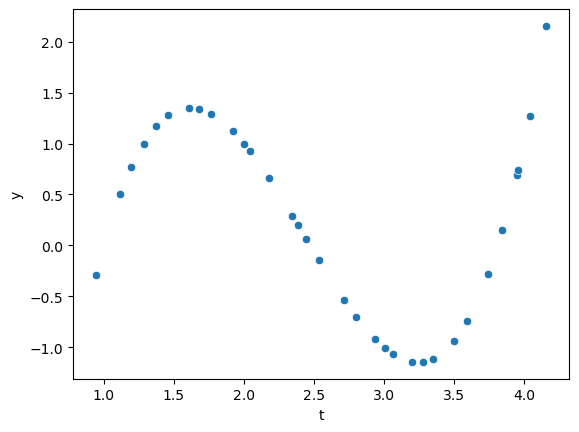

In [44]:
ax=sns.scatterplot(x=new_t, y=data)
ax.set(xlabel='t', ylabel='y')

C:\Users\User\anaconda3\envs\New_one\lib\site-packages\IPython\core\interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


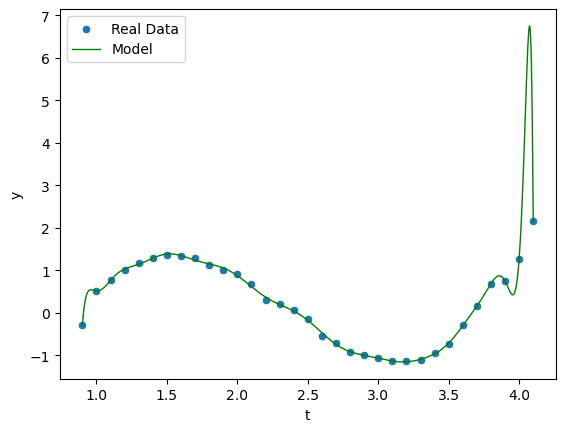

In [45]:
# (a).
model=np.polyfit(t,data,32)
predict = np.poly1d(model)
predict_poly = predict(t)

ax=sns.scatterplot(x=t, y=data)

# plotting the model
mt=np.linspace(0.9,4.1,1000)
predict_poly_m = predict(mt)
ax=sns.lineplot(x=mt, y=predict_poly_m,color='green', linewidth=1)

ax.set(xlabel='t', ylabel='y')
plt.legend(["Real Data","Model"])


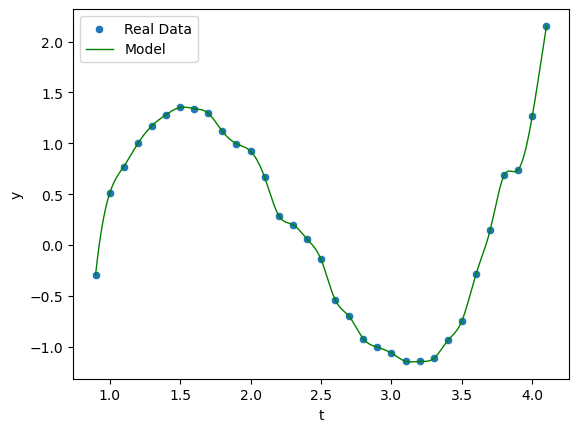

In [46]:
# (b)
from scipy.interpolate import CubicSpline
model = CubicSpline(t,data)
predict_spline = model(t)
ax=sns.scatterplot(x=t, y=data)

# plotting the model
mt=np.linspace(0.9,4.1,1000)
predict_spline_m = model(mt)
ax=sns.lineplot(x=mt, y=predict_spline_m,color='green', linewidth=1)

ax.set(xlabel='t', ylabel='y')
plt.legend(["Real Data","Model"])

__The model (green line) fit better than polynomial__

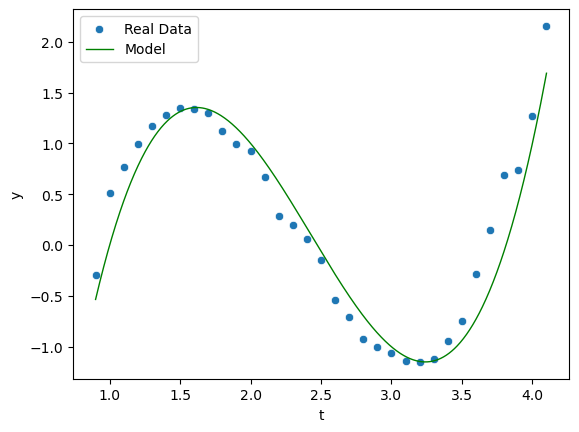

In [47]:
# (c) fit in y=c1+c2*t+c3*t^2+c4*t^3
b=data
A=[]
for i in new_t:
    A.append([1,i,i**2,i**3])
A=np.array(A,dtype=float)

# Using QR factorization to find the least square solution
c1,c2,c3,c4=solve_with_QR(A,b)[0]
predidct_cubic_y=[float(c1+c2*i+c3*i**2+c4*i**3) for i in t]
ax=sns.scatterplot(x=t, y=data)

# plotting the model
mt=np.linspace(0.9,4.1,1000)
predidct_cubic_y_m=[float(c1+c2*i+c3*i**2+c4*i**3) for i in mt]
ax=sns.lineplot(x=mt, y=predidct_cubic_y_m,color='green', linewidth=1)


ax.set(xlabel='t', ylabel='y')
plt.legend(["Real Data","Model"])

### The RMSE of the fit for the three models

In [48]:
def RMSE(y,predict_y):
    error=y-predict_y
    sqrt_SE=np.linalg.norm(error)
    RMSE=sqrt_SE/(error.shape[0]**0.5)
    return RMSE

print('RMSE_a:',RMSE(np.array(data),predict_poly))
print('RMSE_b:',RMSE(np.array(data),predict_spline))
print('RMSE_c:',RMSE(np.array(data),predidct_cubic_y))

RMSE_a: 0.031286571546233856
RMSE_b: 0.0
RMSE_c: 0.2731162978527533


__Based on the above RMSE, the cubic spline model fit the best and the cubic polynomial fits the worst. From the above results, we know that increasing the degree of the model, helps fitting. However, a very high-degree polynomial model could perform worse than a low-degree model since overfitting might happen. According to the result, the cubic spline model makes more sense.__